# R-Initialization

### R-Package Download

In [1]:
library(ggplot2) # For Plot Visualizations
library(car) # For Variance Inflation Factor function -- vif()
library(corrplot) # For Correlation Visualizations
library(data.table) # For Complex Data Frame Joins

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Loading required package: carData
corrplot 0.84 loaded


### Plot Configuration

In [2]:
options(repr.plot.width = 6, repr.plot.height = 6) # Size of plots
alpha = 0.35 # Opacity of points on plots
size = 0.5 # Size of points on plots

### Data Configuration

In [38]:
outlier_coef = 50 # Points above outlier_coef * mean are discarded as outlier events
socioeco_vec = c("Low income","Lower middle income","Upper middle income","High income")

# Data Initialization

### Data Download

In [3]:
# Downloading Vaccination Data
vaccination = read.csv(url(paste0("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv")))

# Downloading Testing Data
testing = read.csv(url(paste0("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/testing/covid-testing-all-observations.csv")))

# Downloading Hospitalization Data
hospitalization = read.csv(url(paste0("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/hospitalizations/covid-hospitalizations.csv")))

# Downloading Deaths Data
death = read.csv(url(paste0("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/cases_deaths/COVID-19%20Cases%20and%20deaths%20-%20WHO.csv")))
# deaths = read.csv(url(paste0("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/jhu/new_deaths_per_million.csv")))



In [4]:
head(vaccination)
head(testing)
head(hospitalization)
head(death)

location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
Afghanistan,AFG,2021-02-22,0,0,NA,NA,NA,NA,0,0,NA,NA,NA,NA,NA
Afghanistan,AFG,2021-02-23,NA,NA,NA,NA,NA,1367,NA,NA,NA,NA,33,1367,0.003
Afghanistan,AFG,2021-02-24,NA,NA,NA,NA,NA,1367,NA,NA,NA,NA,33,1367,0.003
Afghanistan,AFG,2021-02-25,NA,NA,NA,NA,NA,1367,NA,NA,NA,NA,33,1367,0.003
Afghanistan,AFG,2021-02-26,NA,NA,NA,NA,NA,1367,NA,NA,NA,NA,33,1367,0.003
Afghanistan,AFG,2021-02-27,NA,NA,NA,NA,NA,1367,NA,NA,NA,NA,33,1367,0.003


Entity,ISO.code,Date,Source.URL,Source.label,Notes,Cumulative.total,Daily.change.in.cumulative.total,Cumulative.total.per.thousand,Daily.change.in.cumulative.total.per.thousand,X7.day.smoothed.daily.change,X7.day.smoothed.daily.change.per.thousand,Short.term.positive.rate,Short.term.tests.per.case
Afghanistan - tests performed,AFG,2022-01-29,http://www.emro.who.int/images/stories/coronavirus/covid-sitrep-28.pdf,WHO Regional Office for the Eastern Mediterranean,,853003,NA,21.272,NA,NA,NA,NA,NA
Afghanistan - tests performed,AFG,2022-01-30,,,,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan - tests performed,AFG,2022-01-31,,,,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan - tests performed,AFG,2022-02-01,,,,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan - tests performed,AFG,2022-02-02,,,,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan - tests performed,AFG,2022-02-03,,,,NA,NA,NA,NA,NA,NA,NA,NA


entity,iso_code,date,indicator,value
Algeria,DZA,2020-07-17,Daily ICU occupancy,62.000
Algeria,DZA,2020-07-17,Daily ICU occupancy per million,1.381
Algeria,DZA,2020-07-18,Daily ICU occupancy,67.000
Algeria,DZA,2020-07-18,Daily ICU occupancy per million,1.492
Algeria,DZA,2020-07-20,Daily ICU occupancy,64.000
Algeria,DZA,2020-07-20,Daily ICU occupancy per million,1.425


Country,Year,Daily.new.confirmed.cases.of.COVID.19,Daily.new.confirmed.deaths.due.to.COVID.19,Total.confirmed.cases.of.COVID.19,Total.confirmed.deaths.due.to.COVID.19,Daily.new.confirmed.cases.of.COVID.19.per.million.people,Daily.new.confirmed.deaths.due.to.COVID.19.per.million.people,Total.confirmed.cases.of.COVID.19.per.million.people,Total.confirmed.deaths.due.to.COVID.19.per.million.people,...,Weekly.case.growth....,Weekly.death.growth....,Biweekly.cases,Biweekly.deaths,Biweekly.case.growth....,Biweekly.death.growth....,Weekly.cases.per.million.people,Weekly.deaths.per.million.people,Biweekly.cases.per.million.people,Biweekly.deaths.per.million.people
Afghanistan,-18,0,0,NA,NA,0,0,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,-17,0,0,NA,NA,0,0,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,-16,0,0,NA,NA,0,0,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,-15,0,0,NA,NA,0,0,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,-14,0,0,NA,NA,0,0,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,-13,0,0,NA,NA,0,0,NA,NA,...,NA,NA,NA,NA,NA,NA,0,0,NA,NA


### Data Cleanup

In [5]:
# Restructure vaccination
# 2021-02-22 first term (407), 2020-01-12 — day 1
if (vaccination[1,3] != 407) {
    vaccination$date = as.numeric(vaccination$date)+(407-as.numeric(vaccination[1,3]))
}

In [6]:
# Restructure testing
# 2022-01-29 first term (748), 2020-01-12 -- day 1
testing <- transform(testing,location=sub(" .*", "", Entity)) # Creates location column, using regex on Entity column
colnames(testing)[colnames(testing)=="Date"]="date" # Renames Date column to date
if (testing[1,3] != 748) {
    testing$date = as.numeric(testing$date)+(748-as.numeric(testing[1,3]))
}

In [7]:
# Restructure hospitalization
# 2020-07-17 first term (187), 2020-01-12 -- day 1
if (hospitalization[1,3] != 187) {
    hospitalization$date = as.numeric(hospitalization$date)+(187-as.numeric(hospitalization[1,3]))
}
colnames(hospitalization)[colnames(hospitalization)=="entity"]="location" # Renames Date column to date
hospitalization = hospitalization[hospitalization[,4]=="Daily ICU occupancy",]
colnames(hospitalization)[colnames(hospitalization)=="value"]="icu_daily" # Renames value column to icu_daily

In [8]:
# Restructure deaths
# 2029-12-25 first term (-18), 2020-01-12 -- day 1
colnames(death)[colnames(death) == "Year"] ="date"
colnames(death)[colnames(death) == "Country"] ="location"

In [9]:
head(vaccination)
head(testing)
head(hospitalization)
head(death)

location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
Afghanistan,AFG,407,0,0,NA,NA,NA,NA,0,0,NA,NA,NA,NA,NA
Afghanistan,AFG,408,NA,NA,NA,NA,NA,1367,NA,NA,NA,NA,33,1367,0.003
Afghanistan,AFG,409,NA,NA,NA,NA,NA,1367,NA,NA,NA,NA,33,1367,0.003
Afghanistan,AFG,410,NA,NA,NA,NA,NA,1367,NA,NA,NA,NA,33,1367,0.003
Afghanistan,AFG,411,NA,NA,NA,NA,NA,1367,NA,NA,NA,NA,33,1367,0.003
Afghanistan,AFG,412,NA,NA,NA,NA,NA,1367,NA,NA,NA,NA,33,1367,0.003


Entity,ISO.code,date,Source.URL,Source.label,Notes,Cumulative.total,Daily.change.in.cumulative.total,Cumulative.total.per.thousand,Daily.change.in.cumulative.total.per.thousand,X7.day.smoothed.daily.change,X7.day.smoothed.daily.change.per.thousand,Short.term.positive.rate,Short.term.tests.per.case,location
Afghanistan - tests performed,AFG,748,http://www.emro.who.int/images/stories/coronavirus/covid-sitrep-28.pdf,WHO Regional Office for the Eastern Mediterranean,,853003,NA,21.272,NA,NA,NA,NA,NA,Afghanistan
Afghanistan - tests performed,AFG,749,,,,NA,NA,NA,NA,NA,NA,NA,NA,Afghanistan
Afghanistan - tests performed,AFG,750,,,,NA,NA,NA,NA,NA,NA,NA,NA,Afghanistan
Afghanistan - tests performed,AFG,751,,,,NA,NA,NA,NA,NA,NA,NA,NA,Afghanistan
Afghanistan - tests performed,AFG,752,,,,NA,NA,NA,NA,NA,NA,NA,NA,Afghanistan
Afghanistan - tests performed,AFG,753,,,,NA,NA,NA,NA,NA,NA,NA,NA,Afghanistan


,location,iso_code,date,indicator,icu_daily
1,Algeria,DZA,187,Daily ICU occupancy,62
3,Algeria,DZA,188,Daily ICU occupancy,67
5,Algeria,DZA,190,Daily ICU occupancy,64
7,Algeria,DZA,191,Daily ICU occupancy,56
9,Algeria,DZA,192,Daily ICU occupancy,51
11,Algeria,DZA,193,Daily ICU occupancy,66


location,date,Daily.new.confirmed.cases.of.COVID.19,Daily.new.confirmed.deaths.due.to.COVID.19,Total.confirmed.cases.of.COVID.19,Total.confirmed.deaths.due.to.COVID.19,Daily.new.confirmed.cases.of.COVID.19.per.million.people,Daily.new.confirmed.deaths.due.to.COVID.19.per.million.people,Total.confirmed.cases.of.COVID.19.per.million.people,Total.confirmed.deaths.due.to.COVID.19.per.million.people,...,Weekly.case.growth....,Weekly.death.growth....,Biweekly.cases,Biweekly.deaths,Biweekly.case.growth....,Biweekly.death.growth....,Weekly.cases.per.million.people,Weekly.deaths.per.million.people,Biweekly.cases.per.million.people,Biweekly.deaths.per.million.people
Afghanistan,-18,0,0,NA,NA,0,0,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,-17,0,0,NA,NA,0,0,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,-16,0,0,NA,NA,0,0,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,-15,0,0,NA,NA,0,0,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,-14,0,0,NA,NA,0,0,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,-13,0,0,NA,NA,0,0,NA,NA,...,NA,NA,NA,NA,NA,NA,0,0,NA,NA


# Data Analyses

### Method 1:

We are looking purely at the deaths as a function of everything else. This being `Date`, `Location`, `Daily Testing`, `Daily ICU Occipancy`. We are looking at this as a density, to allow for better comparison between countries of different population magnitudes. We merge our data into a set:

In [42]:
data.method1 = merge(x=death,y=vaccination,by=c("location","date")) # Merges death & vaccination data on location and date
data.method1 = merge(x=data.method1,y=testing,by=c("location","date")) # Merges testing data on location and date
data.method1 = merge(x=data.method1,y=hospitalization,by=c("location","date")) # Merges hospitalization data on location and date

# colnames(data.method1)
data.method1 <- data.frame(days_since_start=as.numeric(data.method1$date),location=data.method1$location,
                           deaths_daily_per_mil=data.method1$Daily.new.confirmed.deaths.due.to.COVID.19.per.million.people,
                           tests_daily_per_thd=data.method1$Daily.change.in.cumulative.total.per.thousand,
                           icu_daily=data.method1$icu_daily,vax_daily_per_mil=data.method1$daily_vaccinations_per_million)

data.method1 = na.omit(data.method1)
data.method1 = subset(data.method1, data.method1$deaths_daily_per_mil < outlier_coef * mean(data.method1$deaths_daily_per_mil) &
                      !data.method1$location %in% socioeco_vec)
# head(data.method1)

In [43]:
# sum[data.method1$location == "Australia"]
countries = c("Afghanistan", 
"Africa", "Albania", "Algeria", "American Samoa", "Andorra", 
"Angola", "Anguilla", "Antigua and Barbuda", "Argentina", "Armenia", 
"Aruba", "Asia", "Asia excl. China", "Australia", "Austria", 
"Azerbaijan", "Bahamas", "Bahrain", "Bangladesh", "Barbados", 
"Belarus", "Belgium", "Belize", "Benin", "Bermuda", "Bhutan", 
"Bolivia", "Bonaire Sint Eustatius and Saba", "Bosnia and Herzegovina", 
"Botswana", "Brazil", "British Virgin Islands", "Brunei", "Bulgaria", 
"Burkina Faso", "Burundi", "Cambodia", "Cameroon", "Canada", 
"Cape Verde", "Cayman Islands", "Central African Republic", "Chad", 
"Chile", "China", "Colombia", "Comoros", "Congo", "Cook Islands", 
"Costa Rica", "Cote d'Ivoire", "Croatia", "Cuba", "Curacao", 
"Cyprus", "Czechia", "Democratic Republic of Congo", "Denmark", 
"Djibouti", "Dominica", "Dominican Republic", "Ecuador", "Egypt", 
"El Salvador", "Equatorial Guinea", "Eritrea", "Estonia", "Eswatini", 
"Ethiopia", "Europe", "European Union", "Faeroe Islands", "Falkland Islands", 
"Fiji", "Finland", "France", "French Guiana", "French Polynesia", 
"Gabon", "Gambia", "Georgia", "Germany", "Ghana", "Gibraltar", 
"Greece", "Greenland", "Grenada", "Guadeloupe", "Guam", "Guatemala", 
"Guernsey", "Guinea", "Guinea-Bissau", "Guyana", "Haiti", "High income", 
"Honduras", "Hungary", "Iceland", "India", "Indonesia", "Iran", 
"Iraq", "Ireland", "Isle of Man", "Israel", "Italy", "Jamaica", 
"Japan", "Jersey", "Jordan", "Kazakhstan", "Kenya", "Kiribati", 
"Kosovo", "Kuwait", "Kyrgyzstan", "Laos", "Latvia", "Lebanon", 
"Lesotho", "Liberia", "Libya", "Liechtenstein", "Lithuania", 
"Low income", "Lower middle income", "Luxembourg", "Madagascar", 
"Malawi", "Malaysia", "Maldives", "Mali", "Malta", "Marshall Islands", 
"Martinique", "Mauritania", "Mauritius", "Mayotte", "Mexico", 
"Micronesia (country)", "Moldova", "Monaco", "Mongolia", "Montenegro", 
"Montserrat", "Morocco", "Mozambique", "Myanmar", "Namibia", 
"Nauru", "Nepal", "Netherlands", "New Caledonia", "New Zealand", 
"Nicaragua", "Niger", "Nigeria", "Niue", "North America", "North Korea", 
"North Macedonia", "Northern Mariana Islands", "Norway", "Oceania", 
"Oman", "Pakistan", "Palau", "Palestine", "Panama", "Papua New Guinea", 
"Paraguay", "Peru", "Philippines", "Pitcairn", "Poland", "Portugal", 
"Puerto Rico", "Qatar", "Reunion", "Romania", "Russia", "Rwanda", 
"Saint Barthelemy", "Saint Helena", "Saint Kitts and Nevis", 
"Saint Lucia", "Saint Martin (French part)", "Saint Pierre and Miquelon", 
"Saint Vincent and the Grenadines", "Samoa", "San Marino", "Sao Tome and Principe", 
"Saudi Arabia", "Senegal", "Serbia", "Seychelles", "Sierra Leone", 
"Singapore", "Sint Maarten (Dutch part)", "Slovakia", "Slovenia", 
"Solomon Islands", "Somalia", "South Africa", "South America", 
"South Korea", "South Sudan", "Spain", "Sri Lanka", "Sudan", 
"Suriname", "Sweden", "Switzerland", "Syria", "Tajikistan", "Tanzania", 
"Thailand", "Timor", "Togo", "Tokelau", "Tonga", "Trinidad and Tobago", 
"Tunisia", "Turkey", "Turkmenistan", "Turks and Caicos Islands", 
"Tuvalu", "Uganda", "Ukraine", "United Arab Emirates", "United Kingdom", 
"United States", "United States Virgin Islands", "Upper middle income", 
"Uruguay", "Uzbekistan", "Vanuatu", "Vatican", "Venezuela", "Vietnam", 
"Wallis and Futuna", "World", "World excl. China", "World excl. China and South Korea", 
"World excl. China, South Korea, Japan and Singapore", "Yemen", 
"Zambia", "Zimbabwe")
# hist(x=sum(data.method1$location))
for (country in countries) {
    if (sum(data.method1$location == country)>0) {
        print(country)
        print(sum(data.method1$location == country))
    }
}


[1] "Argentina"
[1] 467
[1] "Australia"
[1] 486
[1] "Austria"
[1] 529
[1] "Belgium"
[1] 538
[1] "Bolivia"
[1] 406
[1] "Bulgaria"
[1] 27
[1] "Canada"
[1] 539
[1] "Chile"
[1] 544
[1] "Cyprus"
[1] 463
[1] "Czechia"
[1] 542
[1] "Denmark"
[1] 551
[1] "Estonia"
[1] 75
[1] "Finland"
[1] 468
[1] "France"
[1] 536
[1] "Ireland"
[1] 76
[1] "Israel"
[1] 550
[1] "Italy"
[1] 542
[1] "Japan"
[1] 70
[1] "Latvia"
[1] 76
[1] "Luxembourg"
[1] 540
[1] "Malaysia"
[1] 480
[1] "Malta"
[1] 74
[1] "Netherlands"
[1] 503
[1] "Portugal"
[1] 448
[1] "Serbia"
[1] 530
[1] "Slovakia"
[1] 535
[1] "Slovenia"
[1] 542
[1] "Spain"
[1] 529
[1] "Sweden"
[1] 532
[1] "Switzerland"
[1] 546


In [44]:
lm_method1 = lm(data=data.method1, deaths_daily_per_mil~.)
df.diagnostics.method1 = data.frame(yhat=fitted(lm_method1),r=resid(lm_method1),y=data.method1$deaths_daily_per_mil,
                                    days_since_start=data.method1$days_since_start,location=data.method1$location,
                                    tests_daily_per_thd=data.method1$tests_daily_per_thd,icu_daily=data.method1$icu_daily,
                                    vax_daily_per_mil=data.method1$vax_daily_per_mil)
summary(lm_method1)


Call:
lm(formula = deaths_daily_per_mil ~ ., data = data.method1)

Residuals:
    Min      1Q  Median      3Q     Max 
-12.628  -1.328  -0.418   0.825  31.683 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          1.406e-01  2.193e-01   0.641    0.522    
days_since_start    -2.453e-03  1.695e-04 -14.468  < 2e-16 ***
locationAustralia    2.357e+00  2.004e-01  11.763  < 2e-16 ***
locationAustria      1.791e+00  2.139e-01   8.374  < 2e-16 ***
locationBelgium      2.904e+00  1.929e-01  15.052  < 2e-16 ***
locationBolivia      3.370e+00  2.069e-01  16.287  < 2e-16 ***
locationBulgaria     1.211e+01  5.297e-01  22.856  < 2e-16 ***
locationCanada       1.900e+00  1.878e-01  10.116  < 2e-16 ***
locationChile        2.426e+00  1.774e-01  13.678  < 2e-16 ***
locationCyprus       2.232e-01  2.551e-01   0.875    0.382    
locationCzechia      5.325e+00  1.916e-01  27.791  < 2e-16 ***
locationDenmark      2.555e+00  2.025e-01  12.620  < 2e-16 ***
locat

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


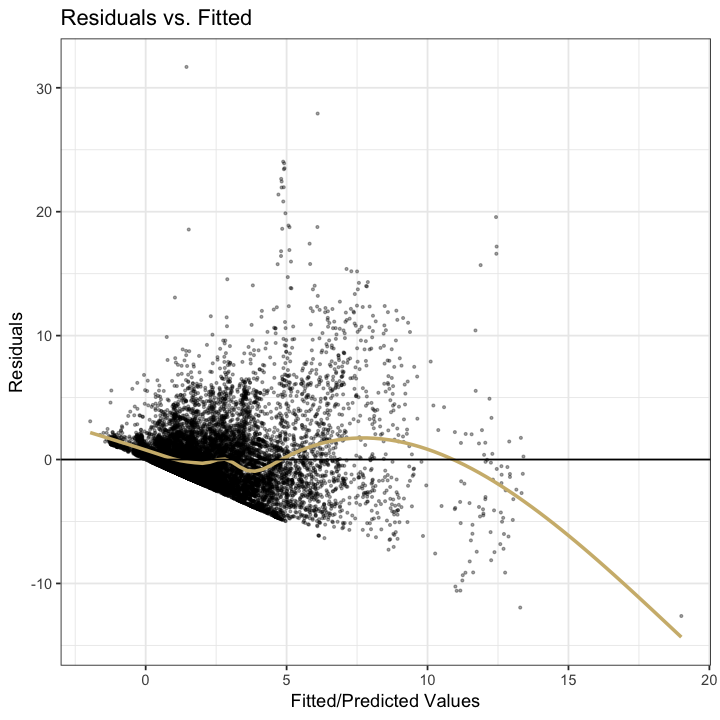

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


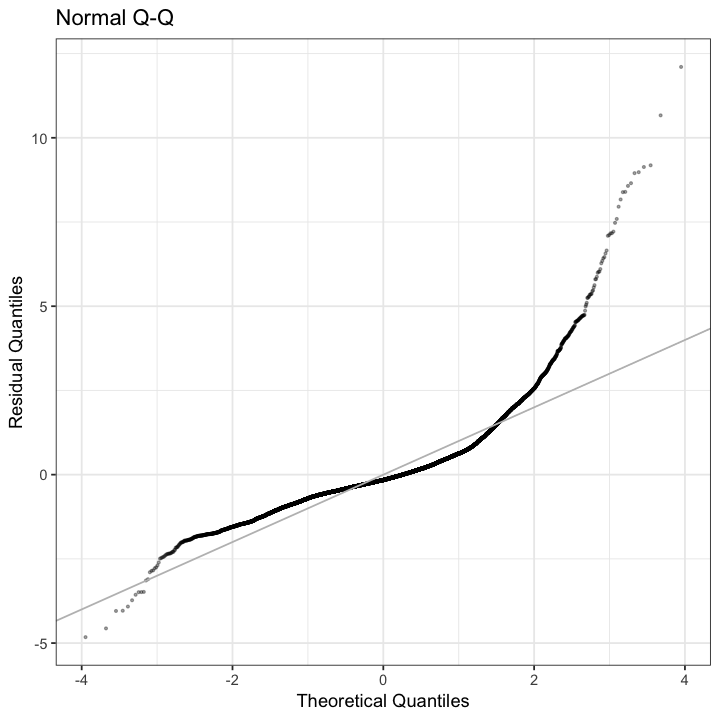

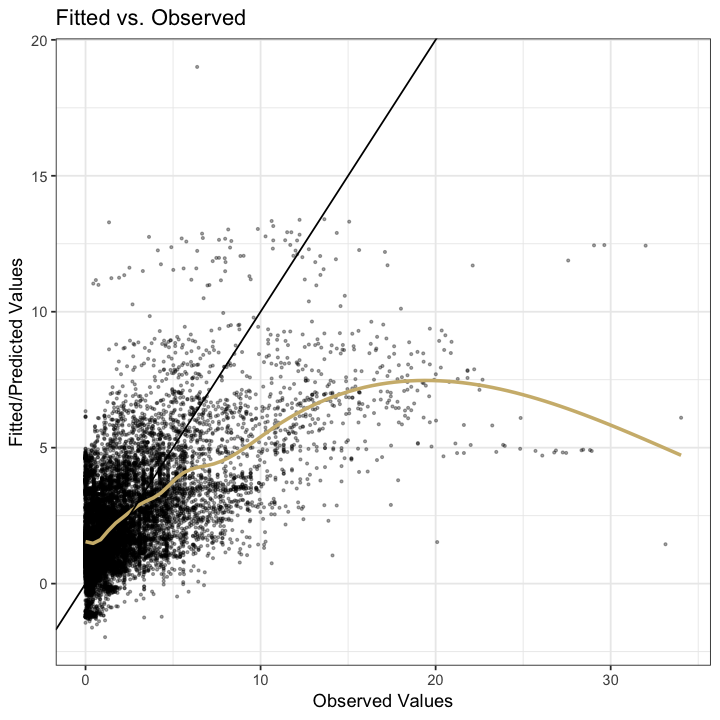

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


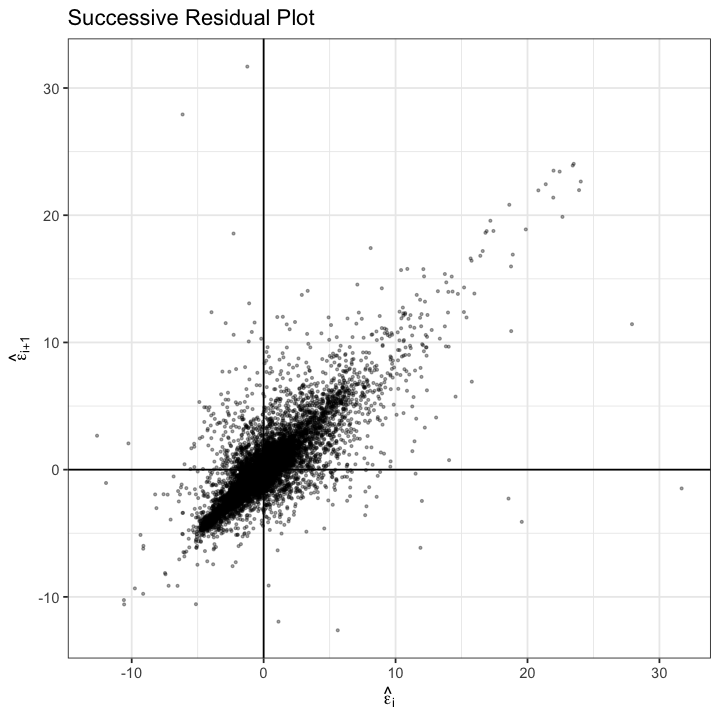

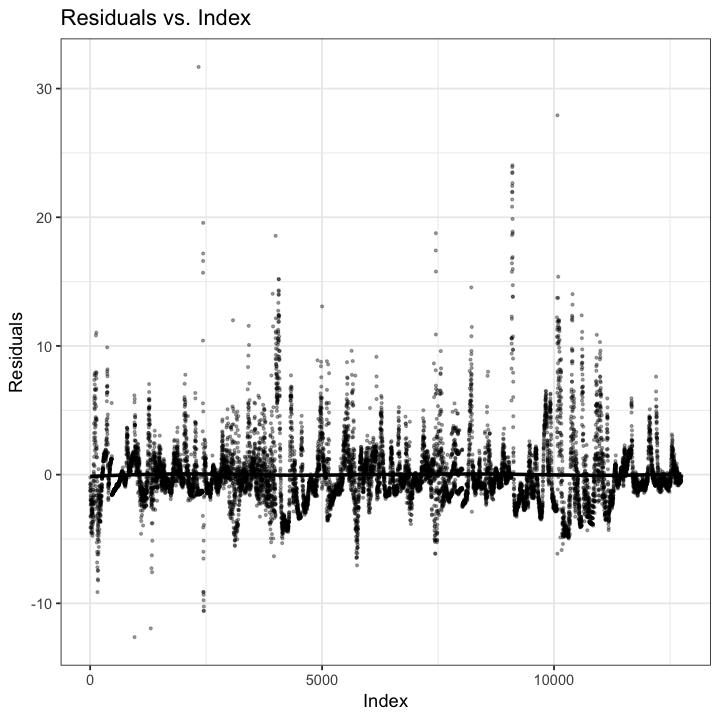

In [45]:
# Residuals vs. Fitted Plot
ggplot(data=df.diagnostics.method1,aes(x=yhat,y=r)) + geom_point(alpha=alpha,size=size) +
    geom_smooth(se=F,col="#CFB87C") + geom_hline(yintercept=0) +
    ggtitle("Residuals vs. Fitted") + xlab("Fitted/Predicted Values") + ylab("Residuals") + theme_bw()

# Normal Q-Q Plot
ggplot(data=df.diagnostics.method1,aes(sample=(r-mean(r))/sd(r))) + stat_qq(alpha=alpha,size=size) + 
    geom_abline(slope=1,intercept=0,col="grey") +
    ggtitle("Normal Q-Q") + xlab("Theoretical Quantiles") + ylab("Residual Quantiles") + theme_bw()

# Fitted vs. Observed Plot
ggplot(data=df.diagnostics.method1,aes(x=y,y=yhat)) + geom_point(alpha=alpha,size=size) +
    geom_smooth(se=F,col="#CFB87C") + geom_abline(intercept=0,slope=1) +
    ggtitle("Fitted vs. Observed") + xlab("Observed Values") + ylab("Fitted/Predicted Values") + theme_bw()

# Successive Residuals Plot
e_i = head(df.diagnostics.method1$r,dim(data.method1)[1]-1)
e_j = tail(df.diagnostics.method1$r,dim(data.method1)[1]-1)
ggplot(data.frame(e_i,e_j),aes(x=e_i,y=e_j)) + geom_point(alpha=alpha,size=size) + 
    geom_vline(xintercept = 0) + geom_hline(yintercept = 0) + 
    ggtitle("Successive Residual Plot") + xlab(expression(hat(epsilon)[i])) + ylab(expression(hat(epsilon)[i+1])) + theme_bw()

# Residuals vs. Index Plot
ggplot(df.diagnostics.method1,aes(x=1:dim(data.method1)[1],y=r)) + 
    geom_point(alpha=alpha,size=size) + geom_smooth(se = F, col = "black") +
    ggtitle("Residuals vs. Index") + xlab("Index") + ylab("Residuals") + theme_bw()

In [46]:
vif(lm_method1)

,GVIF,Df,GVIF^(1/(2*Df))
days_since_start,1.227064,1,1.107729
location,7.265978,29,1.034784
tests_daily_per_thd,2.714880,1,1.647689
icu_daily,2.700160,1,1.643216
vax_daily_per_mil,1.165397,1,1.079535


### Method 2:

For this method, we are going to be observing the daily death density vs Date, Socioeconomic Status, and vaccination density for starters

In [60]:
data.method2 = merge(x=death,y=vaccination,by=c("location","date")) # Merges death & vaccination data on location and date

colnames(data.method2)
data.method2 <- data.frame(days_since_start=as.numeric(data.method2$date),economic_status=data.method2$location,
                           deaths_daily_per_mil=data.method2$Daily.new.confirmed.deaths.due.to.COVID.19.per.million.people,
                           vax_daily_per_mil=data.method2$daily_vaccinations_per_million)

data.method2 = na.omit(data.method2)
data.method2 = subset(data.method2, data.method2$deaths_daily_per_mil < outlier_coef * mean(data.method2$deaths_daily_per_mil) &
                      data.method2$economic_status %in% socioeco_vec)
head(data.method2)

[1] "location"                                                                                            
 [2] "date"                                                                                                
 [3] "Daily.new.confirmed.cases.of.COVID.19"                                                               
 [4] "Daily.new.confirmed.deaths.due.to.COVID.19"                                                          
 [5] "Total.confirmed.cases.of.COVID.19"                                                                   
 [6] "Total.confirmed.deaths.due.to.COVID.19"                                                              
 [7] "Daily.new.confirmed.cases.of.COVID.19.per.million.people"                                            
 [8] "Daily.new.confirmed.deaths.due.to.COVID.19.per.million.people"                                       
 [9] "Total.confirmed.cases.of.COVID.19.per.million.people"                                                
[10] "Total.confirmed.deaths.due.to.COVID.19.per.million.people"                                           
[11] "Days.since.the.total.confirmed.cases.of.COVID.19.reached.100"                                        
[12] "Days.since.the.total.confirmed.deaths.of.COVID.19.reached.5"                                         
[13] "Days.since.the.total.confirmed.cases.of.COVID.19.per.million.people.reached.1"                       
[14] "Days.since.the.total.confirmed.deaths.of.COVID.19.per.million.people.reached.0.1"                    
[15] "Daily.new.confirmed.cases.due.to.COVID.19..rolling.7.day.average..right.aligned."                    
[16] "Daily.new.confirmed.deaths.due.to.COVID.19..rolling.7.day.average..right.aligned."                   
[17] "Daily.new.confirmed.cases.of.COVID.19.per.million.people..rolling.7.day.average..right.aligned."     
[18] "Daily.new.confirmed.deaths.due.to.COVID.19.per.million.people..rolling.7.day.average..right.aligned."
[19] "Case.fatality.rate.of.COVID.19...."                                                                  
[20] "Case.fatality.rate.of.COVID.19......Only.observations.with..100.cases."                              
[21] "Days.since.the.total.confirmed.cases.of.COVID.19.reached.100..with.population...5M."                 
[22] "Has.population...5M.AND.had..100.cases..21.days.ago.AND.has.testing.data"                            
[23] "Weekly.cases"                                                                                        
[24] "Weekly.deaths"                                                                                       
[25] "Weekly.case.growth...."                                                                              
[26] "Weekly.death.growth...."                                                                             
[27] "Biweekly.cases"                                                                                      
[28] "Biweekly.deaths"                                                                                     
[29] "Biweekly.case.growth...."                                                                            
[30] "Biweekly.death.growth...."                                                                           
[31] "Weekly.cases.per.million.people"                                                                     
[32] "Weekly.deaths.per.million.people"                                                                    
[33] "Biweekly.cases.per.million.people"                                                                   
[34] "Biweekly.deaths.per.million.people"                                                                  
[35] "iso_code"                                                                                            
[36] "total_vaccinations"                                                                                  
[37] "people_vaccinated"                                                                                   
[38] 

,days_since_start,economic_status,deaths_daily_per_mil,vax_daily_per_mil
62604,1000,High income,0.531,1118
62605,1001,High income,0.910,1122
62606,1002,High income,1.129,1116
62607,1003,High income,1.091,1131
62608,1004,High income,0.669,1153
62609,1005,High income,2.677,1166
